In [9]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

In [10]:
#load data
data = pd.read_table('fruit_data.txt')

In [11]:
#explore dataset
print(data.shape)
data.head(10)

(59, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [12]:
#membuat dict key pair value  antara fruit_label dengan fruit_name
lookup_fruit_name = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))   
print(lookup_fruit_name)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [13]:
#build model & train data
X = data[['mass', 'width', 'height']]
y = data['fruit_label']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [14]:
#cek dimensi array
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (41, 3)
X_test =  (18, 3)
y_train =  (41,)
y_test =  (18,)


In [15]:
X_train.head()

,mass,width,height
14,152,7.6,7.3
32,164,7.2,7.0
49,132,5.8,8.7
29,160,7.0,7.4
37,154,7.3,7.3


In [16]:
y_train.head()

14    1
32    3
49    4
29    3
37    3
Name: fruit_label, dtype: int64

In [17]:
#class object
knn = KNeighborsClassifier(n_neighbors = 5)

#train data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
#accuracy using test data
knn.score(X_test, y_test)

0.5

In [19]:
#plot
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

C:\Users\Wahyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Wahyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


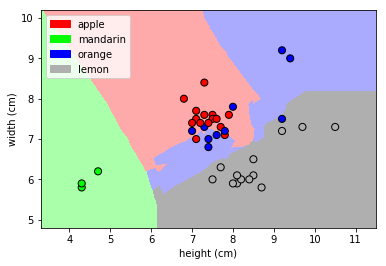

In [20]:
# ayo kita plot
plot_fruit_knn(X_train, y_train, 5, 'uniform')  # n_neighbors = 5

In [21]:
# prediksi buah dengan mass 30gram, lebar 6cm and height 5 cm
fruit_prediction = knn.predict([[30, 6, 5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [22]:
# prediksi buah dengan mass 100gram, width 6cm and height 8 cm
body_prediction = knn.predict([[100, 6, 8]])
lookup_fruit_name[body_prediction[0]]

'lemon'

In [23]:
# prediksi buah dengan mass 30gram, lebar 6cm and height 5 cm
fruit_prediction = knn.predict([[10, 2, 3]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [24]:
# prediksi buah dengan mass 30gram, lebar 6cm and height 5 cm
fruit_prediction = knn.predict([[500, 500, 500]])
lookup_fruit_name[fruit_prediction[0]]

'orange'